In [17]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn import manifold
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist 
import seaborn as sb


In [2]:
df = pd.read_csv('animals-dataset.csv')

In [3]:
df.head(15)

,Region,Stage,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,Anvers,"Adult, 1 Egg Stage",N1A1,39.1,18.7,181.0,3750.0,NaN,NaN,Not enough blood for isotopes.
1,Anvers,"Adult, 1 Egg Stage",N1A2,39.5,17.4,186.0,3800.0,8.94956,-24.69454,NaN
2,Anvers,"Adult, 1 Egg Stage",N2A1,40.3,18.0,195.0,3250.0,8.36821,-25.33302,NaN
3,Anvers,"Adult, 1 Egg Stage",N2A2,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,Anvers,"Adult, 1 Egg Stage",N3A1,36.7,19.3,193.0,3450.0,8.76651,-25.32426,NaN
5,Anvers,"Adult, 1 Egg Stage",N3A2,39.3,20.6,190.0,3650.0,8.66496,-25.29805,NaN
6,Anvers,"Adult, 1 Egg Stage",N4A1,38.9,17.8,181.0,3625.0,9.18718,-25.21799,Nest never observed with full clutch.
7,Anvers,"Adult, 1 Egg Stage",N4A2,39.2,19.6,195.0,4675.0,9.46060,-24.89958,Nest never observed with full clutch.
8,Anvers,"Adult, 1 Egg Stage",N5A1,34.1,18.1,193.0,3475.0,NaN,NaN,No blood sample obtained.
9,Anvers,"Adult, 1 Egg Stage",N5A2,42.0,20.2,190.0,4250.0,9.13362,-25.09368,No blood sample obtained for sexing.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               344 non-null    object 
 1   Stage                344 non-null    object 
 2   Individual ID        344 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    float64
 6   Body Mass (g)        342 non-null    float64
 7   Delta 15 N (o/oo)    330 non-null    float64
 8   Delta 13 C (o/oo)    331 non-null    float64
 9   Comments             26 non-null     object 
dtypes: float64(6), object(4)
memory usage: 27.0+ KB


In [5]:
df.shape

(344, 10)

In [6]:
df.isna().sum()

Region                   0
Stage                    0
Individual ID            0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [7]:
# change comments column to int and drop nulls
df.drop(['Region', 'Stage', 'Individual ID', 'Comments'], axis=1, inplace=True)
# drop nulls
df.dropna(inplace=True)
# review dataset
df.head(5)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
1,39.5,17.4,186.0,3800.0,8.94956,-24.69454
2,40.3,18.0,195.0,3250.0,8.36821,-25.33302
4,36.7,19.3,193.0,3450.0,8.76651,-25.32426
5,39.3,20.6,190.0,3650.0,8.66496,-25.29805
6,38.9,17.8,181.0,3625.0,9.18718,-25.21799


In [8]:
ss = StandardScaler()
X = ss.fit_transform(df)
X = pd.DataFrame(X, columns=df.columns.tolist())

X

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,-0.836108,0.149089,-1.098327,-0.517252,0.392385,1.267428
1,-0.689012,0.452790,-0.452764,-1.201393,-0.662823,0.456176
2,-1.350945,1.110807,-0.596222,-0.952614,0.060131,0.467307
3,-0.872882,1.768824,-0.811410,-0.703836,-0.124192,0.500609
4,-0.946430,0.351556,-1.456974,-0.734933,0.823690,0.602333
...,...,...,...,...,...,...
325,0.579693,-1.723729,0.910092,0.882127,-1.345973,-0.652243
326,0.506145,-1.420029,0.981821,0.788835,-0.584229,-0.567036
327,1.168078,-0.711395,1.483926,1.908338,-0.783618,-0.443598
328,0.211952,-1.166945,0.766634,1.224197,-0.891072,-0.543365


In [9]:
df.corr()


,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),1.000000,-0.225939,0.649178,0.593411,-0.059759,0.180734
Culmen Depth (mm),-0.225939,1.000000,-0.581073,-0.467746,0.605874,0.425820
Flipper Length (mm),0.649178,-0.581073,1.000000,0.874801,-0.507787,-0.382059
Body Mass (g),0.593411,-0.467746,0.874801,1.000000,-0.537888,-0.375582
Delta 15 N (o/oo),-0.059759,0.605874,-0.507787,-0.537888,1.000000,0.570615
Delta 13 C (o/oo),0.180734,0.425820,-0.382059,-0.375582,0.570615,1.000000


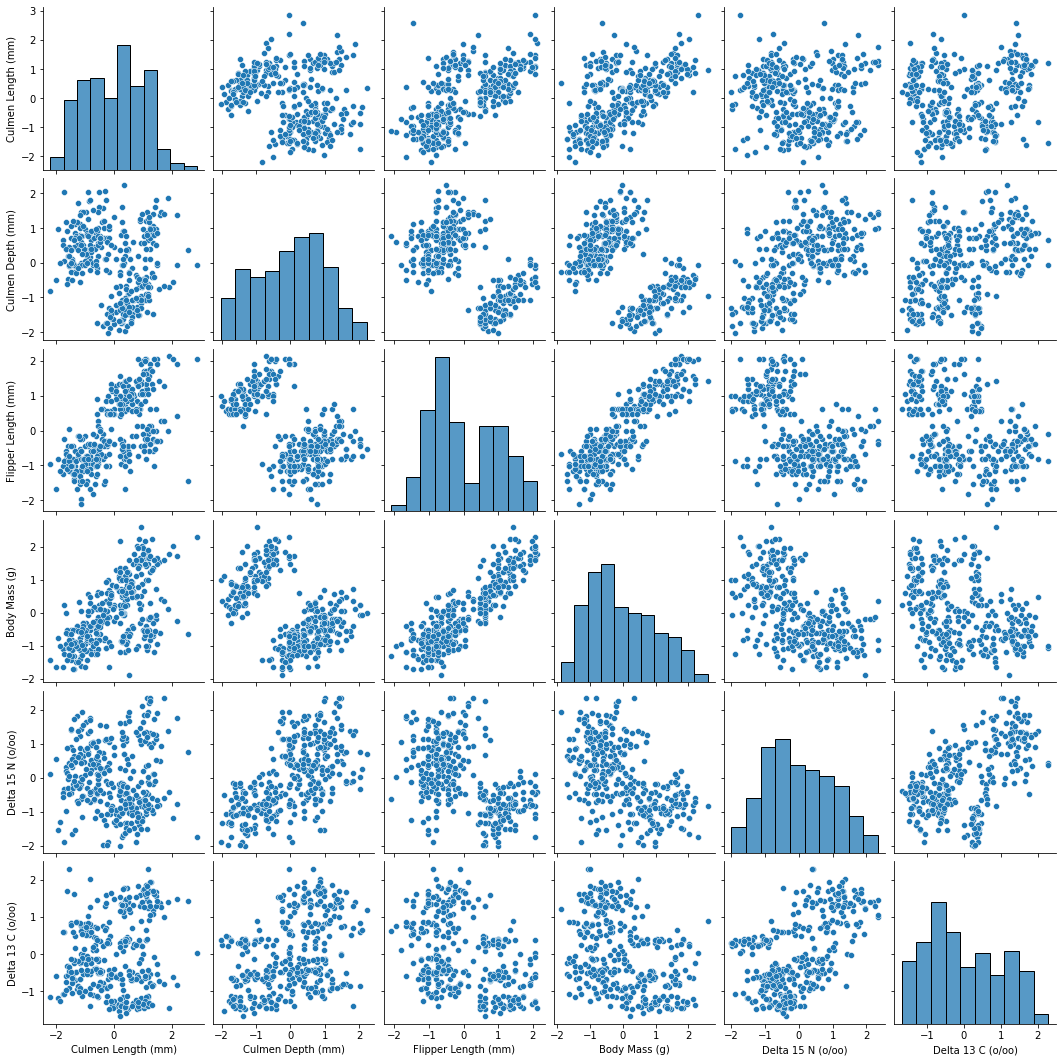

In [18]:
sb.pairplot(X)

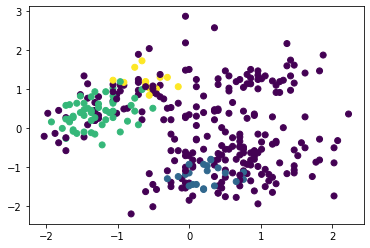

In [10]:
db = DBSCAN(eps=.8,min_samples=12).fit(X)

plt.scatter(X['Culmen Depth (mm)'],X['Culmen Length (mm)'], c=db.labels_)

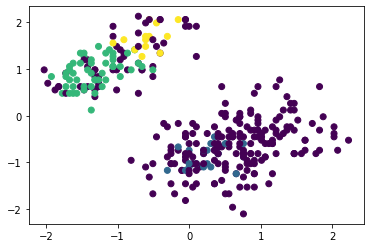

In [12]:
plt.scatter(X['Culmen Depth (mm)'],X['Flipper Length (mm)'], c=db.labels_)

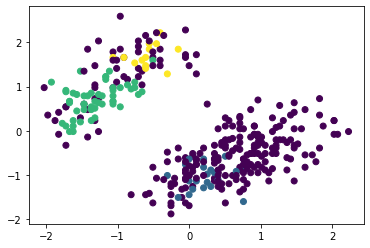

In [13]:
plt.scatter(X['Culmen Depth (mm)'],X['Body Mass (g)'], c=db.labels_)

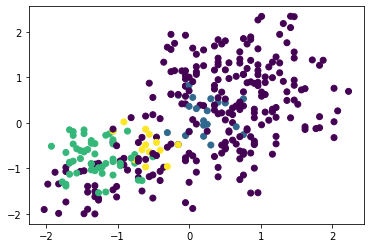

In [14]:
plt.scatter(X['Culmen Depth (mm)'],X['Delta 15 N (o/oo)'], c=db.labels_)

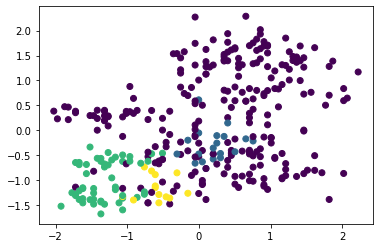

In [15]:
plt.scatter(X['Culmen Depth (mm)'],X['Delta 13 C (o/oo)'], c=db.labels_)

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

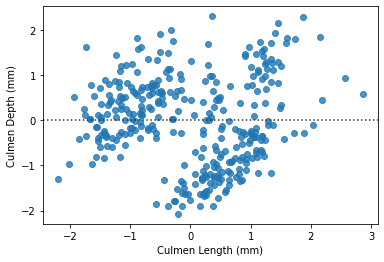

In [24]:
sb.residplot(x="Culmen Length (mm)",y="Culmen Depth (mm)", data=X)

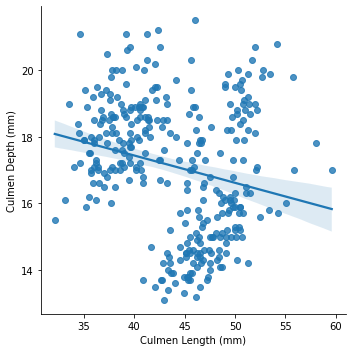

In [25]:
sb.lmplot(x="Culmen Length (mm)",y="Culmen Depth (mm)", data=df)

In [29]:
import warnings
warnings.filterwarnings('ignore')
distortions = [] 
K=range(1,10)
  
for k in range(1,10): 
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)     
      
    distortions.append(kmeanModel.inertia_)

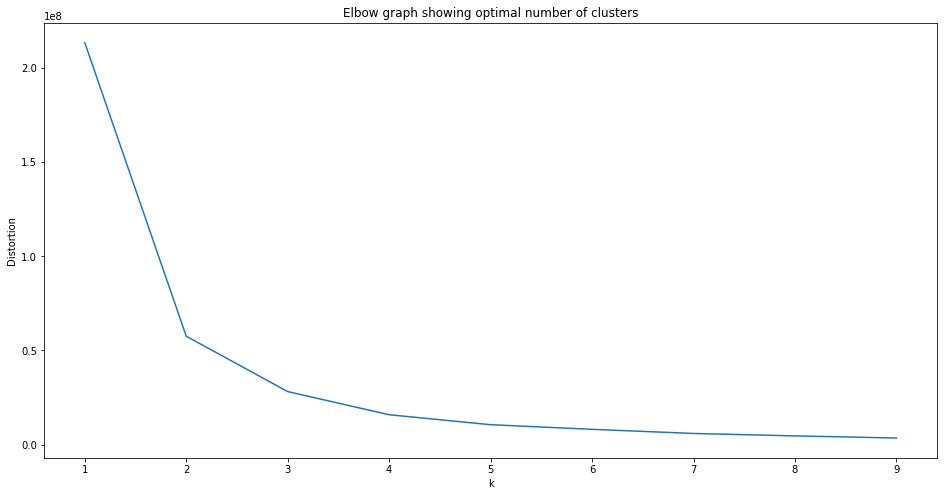

In [32]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow graph showing optimal number of clusters')
plt.show()